In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
A = 0.0341
E = 30.0*1e9
P = 30000.0
p = 2150.0
L =5.0
g = 9.81

In [4]:
def C():
    return E*A

In [5]:
def f():
    return p*g*A

In [6]:
def u0():
    return 0

In [7]:
def du():
    return -P/(E*A)

In [9]:
def u_exact(x):
    return f()/C()*x*x/2+(-P/(C())-(f())/C()*L)*x

In [49]:
def ANS(N):  
  dict_ = { "cond_A":0,"E1":0,'E2':0,"time":0 }
  x_i = np.linspace(0,L,N+1)
  f_v = np.array([f() for i in x_i])
  def psi(x, i):
    if(i==0):
      if(x<=x_i[1]):
        return (x_i[1]-x)/(x_i[1]-x_i[0])
      else:
         return 0
    elif(i==N):
      if(x>x_i[N-1]):
        return (-x_i[N-1]+x)/(x_i[N]-x_i[N-1])
      else:
         return 0
    else:
      if((x>x_i[i-1]) & (x<=x_i[i])):
        return (-x_i[i-1]+x)/(x_i[i]-x_i[i-1])
      elif((x>x_i[i]) & (x<=x_i[i+1])):
        return (x_i[i+1]-x)/(x_i[i+1]-x_i[i])
      else:  
        return 0
  def u_new(u_m, x):
    ans =0
    for i in range(len(u_m)):
      ans+= psi(x, i)*u_m[i]
    return ans
  time1 = time.time()
  A_m = np.zeros((N+1)*(N+1)).reshape(N+1,N+1)
  for i in range(1,N+1):
    A_m[i][i]+=1.0
    A_m[i][i-1]-=1.0
    A_m[i-1][i]-=1.0
    A_m[i-1][i-1]+=1.0
  A_m[0] = np.zeros(N+1)
  A_m[0][0] = 1
  A_m = C()*N/L*A_m
  #print(A_m) 
  P_m = np.zeros((N+1)*(N+1)).reshape(N+1,N+1)
  P_m[0] = np.zeros(N+1)
  P_m[N][N] =1
  L_ = A_m
  dict_['cond_A']= np.linalg.cond(L_)
  R_ = np.zeros(len(f_v))
  for s in range(0,N+1):
    # от x_s до x_s+1
    x_new = 0
    y_new = 0
    if(s<N):
      x_razbienie = np.linspace(x_i[s],x_i[s+1],10000)
      h_new = x_razbienie[1] - x_razbienie[0]
      for j in range(len(x_razbienie)-1):
        x_new += h_new*f()*((x_razbienie[j]-x_i[s+1])/(x_i[s]-x_i[s+1])+
                       (x_razbienie[j+1]-x_i[s+1])/(x_i[s]-x_i[s+1]))/2

        y_new += h_new*f()*((-x_razbienie[j]+x_i[s])/(x_i[s]-x_i[s+1])+
                       (-x_razbienie[j+1]+x_i[s])/(x_i[s]-x_i[s+1]))/2         
      R_[s]+=-x_new
      R_[s+1]+=-y_new

    R_[s]+= du()*C()*psi(L,s)
  R_[0] = 0
  ans = np.linalg.inv(L_).dot(R_)
  time2 = time.time()
  Q = 10
  x_new = np.linspace(0,L,Q)
  y_new = [u_new(ans, i) for i in x_new]
  y_old = u_exact(x_new)
  dict_['E1'] = (np.abs((y_new-y_old)).max()/np.abs(y_old).max())
  
  suma_up = 0
  suma_down = 0
  h = x_new[1]-x_new[0]
  for i in range(len(x_new)-1):
    suma_up+= ((u_exact(x_new[i])-u_new(ans,x_new[i]))**2+(u_exact(x_new[i+1])-u_new(ans,x_new[i+1]))**2)#/2
    suma_down+=(u_exact(x_new[i])**2+u_exact(x_new[i+1])**2)#/2
  dict_['E2']=(np.sqrt(suma_up/suma_down))
  dict_['time']=(time2-time1)
  print(' '.join(str("{:.2e}".format(i)) for i in list(dict_.values())))
  plt.subplots(figsize=(7,7))
  y_new = [u_new(ans,i) for i in x_i]
  plt.plot(x_new, y_old,lw=4,alpha=0.9, label='Точное решение')
  plt.plot(x_i, y_new,lw=2,ls='--', marker='o',ms=15/np.log2(N), label=f'МКЭ N={N}')
  #plt.legend()
  plt.xlabel("x", size=20)
  plt.ylabel("u", size=20)
  plt.xticks(size=15)
  plt.yticks(size=15)
  plt.legend(prop={'size': 15})
  plt.savefig(f'{N}_sol.png')
  #plt.show()

8.34e+00 3.49e-03 4.40e-03 1.56e-01
3.03e+01 8.73e-04 1.10e-03 2.99e-01
1.14e+02 2.18e-04 2.75e-04 5.60e-01
4.38e+02 5.45e-05 6.87e-05 1.11e+00
1.71e+03 1.36e-05 1.72e-05 2.32e+00
6.74e+03 3.41e-06 4.29e-06 4.58e+00
2.68e+04 8.52e-07 1.07e-06 8.69e+00


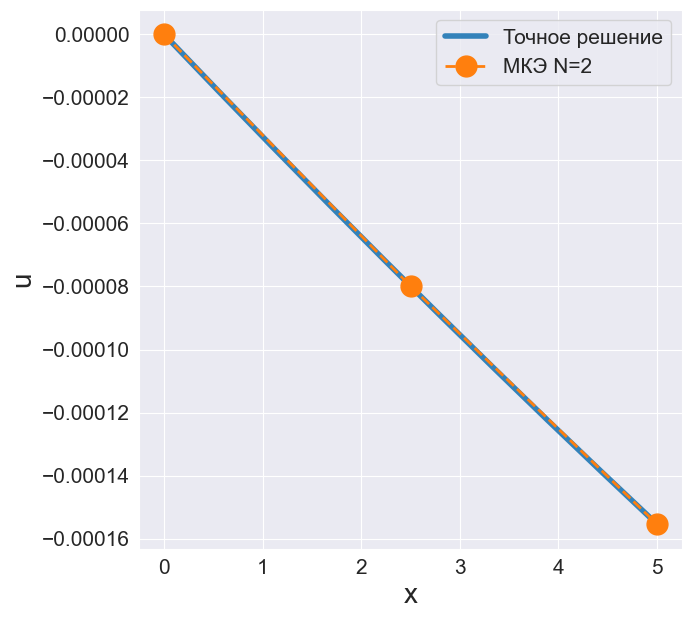

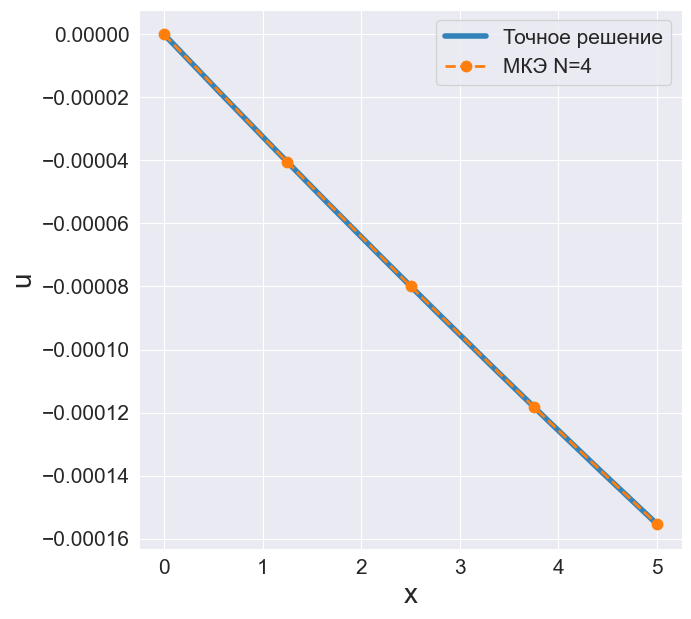

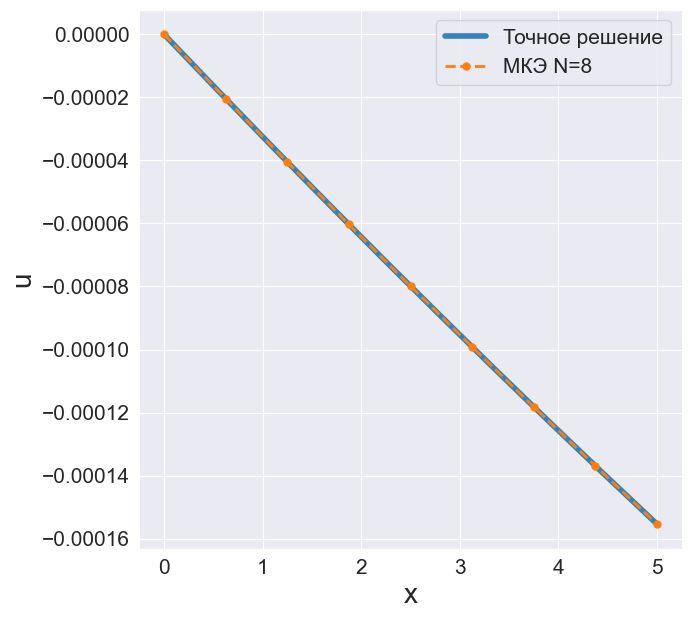

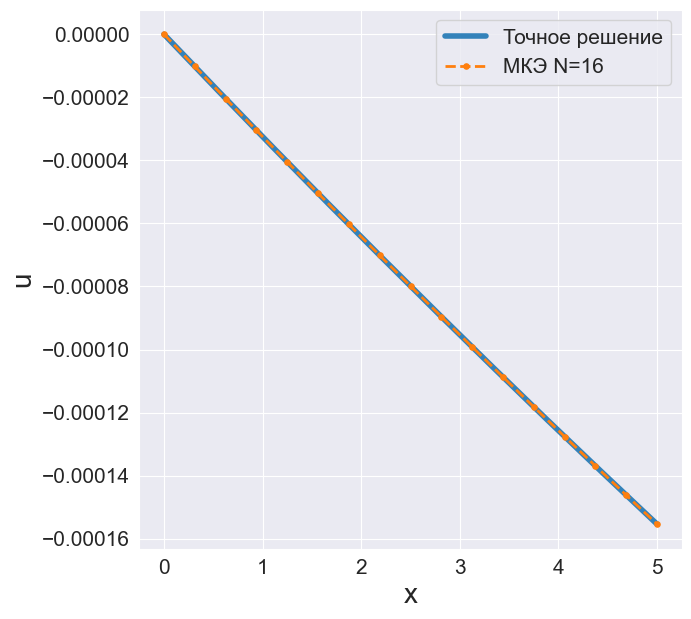

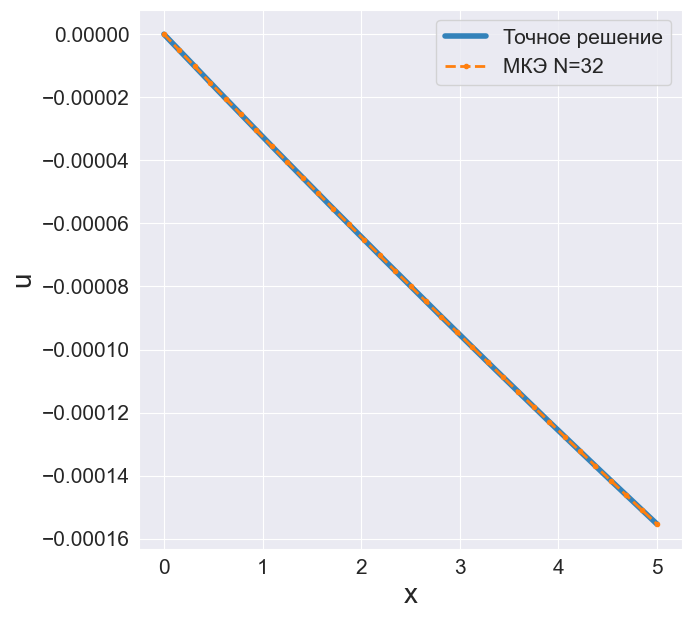

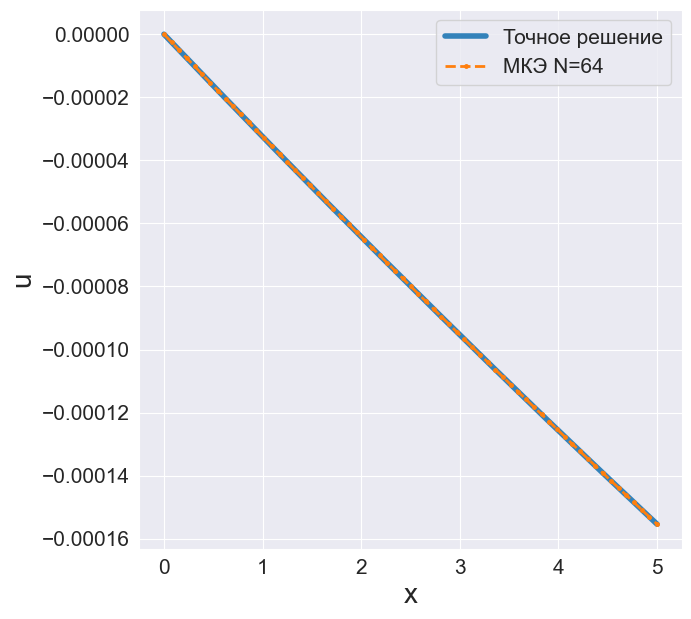

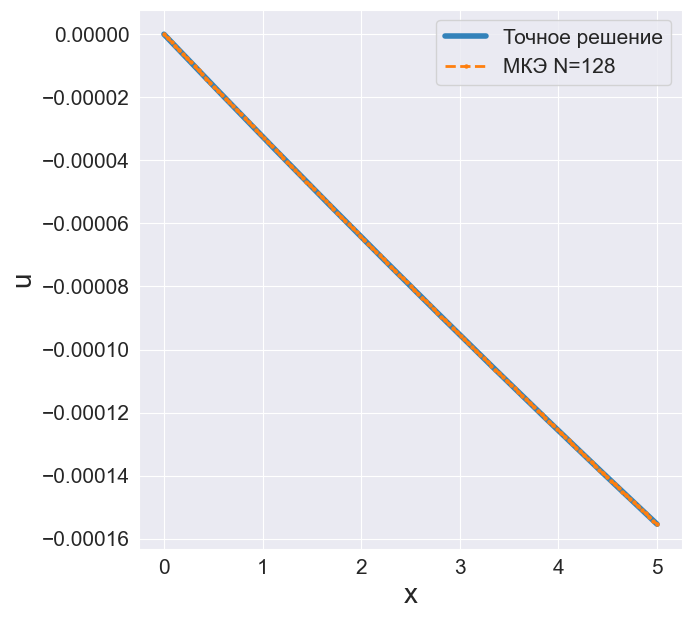

In [50]:
for i in [2**i for i in range(1, 8)]:
    ANS(i)

In [48]:
2 / 2 * 2 * 2

4.0